# Doggos vs Cattos

### Computer Vision

### Project: Build a Neural Network classifier that will classify pictures of dogs and cats.
_**Doggos vs Cattos**_ is a machine learning project focused on researching how diffrent learning algorithms perform in terms of classification RGB images and what kind of information can be mined using them.

### Load data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dogs_vs_cats import data_utils

plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2

Check if tensorflow works with GPU

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from dogs_vs_cats import extract_data

img_width = 150
img_height = 150
channels = 3

train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(extract_data.TRAIN_DATA_PATH,
                                              target_size=(img_width, img_height),
                                              batch_size=20,
                                              class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = train_datagen.flow_from_directory(extract_data.VAL_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Neural network model

In [5]:
from tensorflow.keras import models, layers

neural_net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [6]:
neural_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
history = neural_net.fit(train_gen, steps_per_epoch=100,
                         epochs=45,
                         validation_data=val_gen,
                         validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/45
100/100 [==============================] - 40s 398ms/step - loss: 0.6889 - acc: 0.5350 - val_loss: 0.6916 - val_acc: 0.4890
Epoch 2/45
100/100 [==============================] - 28s 282ms/step - loss: 0.6818 - acc: 0.5515 - val_loss: 0.6678 - val_acc: 0.5830
Epoch 3/45
100/100 [==============================] - 23s 228ms/step - loss: 0.6575 - acc: 0.5955 - val_loss: 0.6408 - val_acc: 0.6050
Epoch 4/45
100/100 [==============================] - 26s 258ms/step - loss: 0.6341 - acc: 0.6380 - val_loss: 0.5840 - val_acc: 0.7140
Epoch 5/45
100/100 [==============================] - 34s 339ms/step - loss: 0.5800 - acc: 0.6930 - val_loss: 0.5691 - val_acc: 0.7260
Epoch 6/45
100/100 [==============================] - 24s 245ms/step - loss: 0.5797 - acc: 0.6985 - val_loss: 0.5792 - val_acc: 0.7070
Epoch 7/45
100/100 [==============================] - 27s 268ms/step - loss: 0.5735 - acc: 0.6940

In [8]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

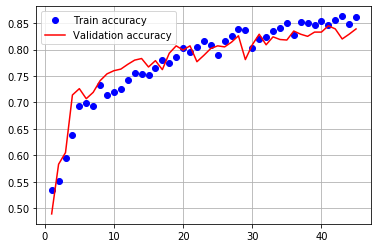

In [9]:
# Plot accuracy
train_acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = np.arange(1, 46)

plt.plot(epochs, train_acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.grid()
plt.legend(loc='best')

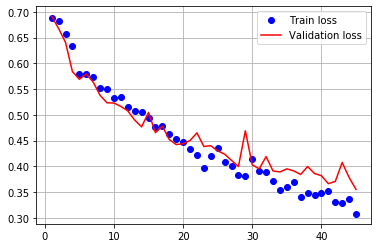

In [10]:
# Plot loss
train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

plt.plot(epochs, train_loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.grid()
plt.legend(loc='best')

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = train_datagen.flow_from_directory(extract_data.TEST_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

test_loss, test_acc = neural_net.evaluate(test_gen, verbose=2)
print(f'Model accuracy : {test_acc}\nModel loss : {test_loss}')

Found 5000 images belonging to 2 classes.
  ...
    to  
  ['...']
250/250 - 37s - loss: 0.3688 - acc: 0.8332
Model accuracy : 0.8331999778747559
Model loss : 0.36884602630138397


### Transfer learning with VGG16 architecture

In [12]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(extract_data.TRAIN_DATA_PATH,
                                              target_size=(img_width, img_height),
                                              batch_size=20,
                                              class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = train_datagen.flow_from_directory(extract_data.VAL_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

conv_base.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(train_gen, steps_per_epoch=100, 
                    epochs=30,
                    validation_data=val_gen, validation_steps=50, 
                    verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 - 37s - loss: 0.5096 - acc: 0.7695 - val_loss: 0.3831 - val_acc: 0.8570
Epoch 2/30
100/100 - 32s - loss: 0.3586 - acc: 0.8525 - val_loss: 0.3397 - val_acc: 0.8500
Epoch 3/30
100/100 - 32s - loss: 0.3260 - acc: 0.8655 - val_loss: 0.2908 - val_acc: 0.8810
Epoch 4/30
100/100 - 32s - loss: 0.2827 - acc: 0.8840 - val_loss: 0.2735 - val_acc: 0.8920
Epoch 5/30
100/100 - 32s - loss: 0.2786 - acc: 0.8810 - val_loss: 0.2590 - val_acc: 0.8940
Epoch 6/30
100/100 - 32s - loss: 0.2590 - acc: 0.8940 - val_loss: 0.2565 - val_acc: 0.8880
Epoch 7/30
100/100 - 32s - loss: 0.2473 - acc: 0.9005 - val_loss: 0.2416 - val_acc: 0.9080
Epoch 8/30
100/100 - 32s - loss: 0.2388 - acc: 0.8980 - val_loss: 0.2388 - val_acc: 0.9020
Epoch 9/30
100/100 - 32s - loss: 0.2304 - acc: 0.9070 - val_loss: 0.2502 - val_acc: 0.8960
Epoch 10/30
100/100 - 32s - loss: 0.2330 - acc: 0.9065 - val_loss: 0.2291 - val_acc: 0.9

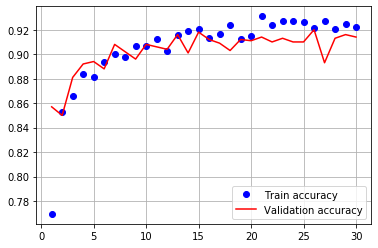

In [17]:
hist_dict = history.history
train_acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = np.arange(1, 31)

plt.plot(epochs, train_acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.grid()
plt.legend(loc='best')

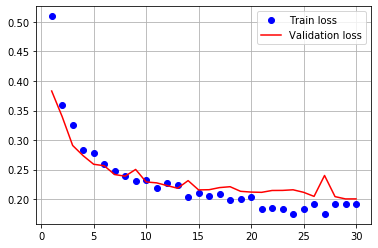

In [18]:
train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

plt.plot(epochs, train_loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.grid()
plt.legend(loc='best')

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = train_datagen.flow_from_directory(extract_data.TEST_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

test_loss, test_acc = model.evaluate(test_gen, verbose=2)
print(f'Model accuracy : {test_acc}\nModel loss : {test_loss}')

Found 5000 images belonging to 2 classes.
  ...
    to  
  ['...']
250/250 - 53s - loss: 0.2227 - acc: 0.9090
Model accuracy : 0.9089999794960022
Model loss : 0.2227451630309224
